## Introduction

As a movie enthusiast I decided to do a project in the movies sphere. I watch a lot of movies and consider it as an art which combines works of so many talents such as: actors, screenwriters, visual effect artists, cinematographers etc. Before watching any movie I first check whether the movie has a good user rating or not. Good movies should be well-written, have talented actors and eyecatching visuals. To achieve these criteria a film production requires certain budget. That's why I decided to check if there is a relation between budget of the movie and it's user rating. There are basicaly two camps of thought. One group thinks that high budget means better quality of movie production, hence better rating. The other group says that lower budget forces moviemakers to be more creative in the given limits, as a result movie becomes revolutionary, hence well-rated. So the aim of the study will be to identify which of these two groups is right. To do this I used the <a href="http://imdb.com" target="_blank">IMDB</a> website - the biggest library of movies, tv-shows and actors. IMDB is a purely english-interface website meaning that it's users must know english. Although it has movies in other languages, my project is focused only on english language movies. Because movies in other languages are initally produced for non-english viewers which do not use this portal, hence movies do not have proper representation of the user rating. Not only the language but the release year will be the defining feature, by that I mean, I will consider movies released in the 21 century. There are two reasons why I do that: firstly, modern movies have a completely different approach to production due to technologies improvement which affects the budget; secondly, personally, I prefer watching modern movies, so my interest will be focused on them. Lastly, how do I define the threshold for the budget? According to the <a href="https://www.dga.org/Contracts/Agreements/Low-Budget.aspx" target="_blank">Directors' Guild of America</a> (high credibility association of american movie directors) the low-budget movie must have at most 11,000,000$ for the production. Considering all of these above we now can put together our research question: 

### Among movies in english released in the 21 century do high budget movies have an average user rating significantly higher than the movies with low budget in the same category?


## Methodology

Although IMDB has their own api, which allows easily get the required information about the movie I didn't use it. Instead I have to choose movies randomly and parse each movie's page separately. In order to be more precise I decided to get 1000 random movies. 

One of the problems I faced during this process is that there is some difficulty with the random selection. At first I generated random 7 digit number which substituted xxxxxxx in the *imdb.com/title/ttxxxxxxx* but this sometimes opens pages with tv-shows. So this method is not good. That is when I found the website called <a href="http://suggestmemovie.com" target="_blank">SuggestMeMovie.com</a> which generates completely random movie in any language released at any time and, most importantly, provides the link to IMDB page of that movie. The problem is that I don't know how it works, but after researching the collected data I had confidence in randomness of this platform. Both IMDB and SuggestMeMovie allow web-scraping.

The process of collection is simple, send request to suggestmemovie.com, get the link to IMDB page and scrape it. Although I request for 1000 movies there are sometimes errors regarding the proxy, so my code avoids such movies and skips them, as a result it returns less than 1000 movies. After collecting data 10 times I got values between 850 and 950, so in this project I will cut my dataset to 800 movies later. This is in case if we want to repeat this project several times and make proper statement about the confidence interval. 

All of these ensures that this project uses Simple Random Sampling method. I've made some background research on the project's question and haven't found any research being conducted. The variables include basic information about the movie. They include categorical(ex: language, genre), dicrete(ex: year), continuous(ex: rating) data.

## Analysis

Let's load important libraries and our dataset

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats.distributions as dist
import pylab 
import scipy.stats as stats

In [2]:
#import dataset, change the datatype of some columns
df = pd.read_csv('dataset.csv', index_col = 0)
df = df.astype({'budget': 'Int64', 'US_box_office': 'Int64', 'box_office': 'Int64'})
df.head(15)

,title,year,director,genre,country,language,budget,US_box_office,box_office,usr_rating,metacritic
0,The Mattei Affair,1972.0,Francesco Rosi,Biography,Italy,Italian,<NA>,<NA>,<NA>,7.6,NaN
1,Sibir. Monamur,2011.0,Vyacheslav Ross,Drama,Russia,Russian,<NA>,<NA>,115240,7.6,NaN
2,Insectula!,2015.0,Michael Peterson,Comedy,USA,English,<NA>,<NA>,<NA>,4.7,NaN
3,Aknyeo,2017.0,Byung-gil Jung,Action,South Korea,Korean,<NA>,27741,8737458,6.7,64.0
4,Dipu Number 2,1996.0,Morshedul Islam,Adventure,Bangladesh,Bengali,<NA>,<NA>,<NA>,8.9,NaN
5,Iron Sky,2012.0,Timo Vuorensola,Action,Finland,English,7500000,122082,10109659,5.9,NaN
6,Le Petit Soldat,1963.0,Jean-Luc Godard,War,France,French,180000,24296,24296,7.2,97.0
7,The Time Machine,1960.0,George Pal,Adventure,USA,English,750000,<NA>,5902,7.6,67.0
8,1945,2017.0,Ferenc Török,Drama,Hungary,Hungarian,1467000,1006193,1240663,7.1,73.0
9,Defying Gravity,1997.0,John Keitel,Drama,USA,English,<NA>,<NA>,<NA>,6.6,45.0


Now let's see the description of each column

In [3]:
df.describe(include = 'all')

,title,year,director,genre,country,language,budget,US_box_office,box_office,usr_rating,metacritic
count,876,876.000000,876,876,876,874,3.860000e+02,4.220000e+02,5.590000e+02,876.000000,392.000000
unique,857,NaN,779,20,57,53,NaN,NaN,NaN,NaN,NaN
top,Fingers,NaN,Alfred Hitchcock,Drama,USA,English,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,4,243,378,505,NaN,NaN,NaN,NaN,NaN
mean,NaN,1992.754566,NaN,NaN,NaN,NaN,6.059935e+07,2.666221e+07,4.302144e+07,6.924886,63.482143
std,NaN,23.383076,NaN,NaN,NaN,NaN,5.484248e+08,6.035067e+07,1.310986e+08,0.639873,15.000586
min,NaN,1921.000000,NaN,NaN,NaN,NaN,3.000000e+00,5.090000e+02,2.170000e+02,4.100000,1.000000
25%,NaN,1977.000000,NaN,NaN,NaN,NaN,1.702500e+06,1.553492e+05,3.099995e+05,6.500000,53.000000
50%,NaN,2001.000000,NaN,NaN,NaN,NaN,6.750000e+06,2.073114e+06,3.340382e+06,6.850000,64.500000
75%,NaN,2012.000000,NaN,NaN,NaN,NaN,2.300000e+07,2.881500e+07,2.400916e+07,7.300000,74.000000


We observe that the average *usr_rating* is at 6.92 for this sample and the mean *budget* is at 60.5 million dollars. As we can see from the *title* column there are 876 movies, now let's cut our dataset to 800 movies total

In [4]:
print('Initial dataset shape', df.shape)
dx = df.dropna(subset = ['title']).head(800).reset_index(drop = True)
print('Shape of the dataset after removing null values and extra movies', dx.shape)

Initial dataset shape (1000, 11)
Shape of the dataset after removing null values and extra movies (800, 11)


import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
dy = df.dropna(subset = ['usr_rating','box_office']).reset_index(drop = True)
X = torch.tensor(dy.usr_rating, dtype = torch.double)
Y = torch.tensor(dy.box_office, dtype = torch.double)

def forward(x):
    return w * x + b
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

LOSS_SGD = []
lr = 0.01
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
def train_model_SGD(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        LOSS_SGD.append(criterion(Yhat, Y).tolist())
        for x, y in zip(X, Y):
            yhat = forward(x)
            loss = criterion(yhat, y)
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
            #print(w.data,b.data)
    return w.data, b.data

w_n, b_n = train_model_SGD(10)
l = w_n * X + b_n
plt.plot(X.numpy(),Y.numpy(), 'ro', label = 'y')
plt.plot(X.numpy(),l.numpy(), label = 'f')
plt.xlabel('user rating')
plt.ylabel('box_office')
plt.legend()
plt.show()

Let's analyze the new dataset 

Number of uniques languages in the dataset = 50
Number of uniques genres in the dataset = 20
56
718
Number of movies only in english = 464
Number of movies released in the 20th century = 385
Number of movies released in the 21st century = 415


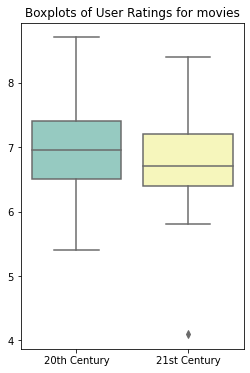

In [5]:
print('Number of uniques languages in the dataset =', dx.language.nunique())
print('Number of uniques genres in the dataset =', dx.genre.nunique())
print(dx.country.nunique())
print(dx.director.nunique())
print('Number of movies only in english =', dx.loc[dx.language == 'English'].title.count())
print('Number of movies released in the 20th century =', dx.loc[dx.year<2000].title.count())
print('Number of movies released in the 21st century =', dx.loc[dx.year>=2000].title.count())

before_2000 = dx.loc[dx.year<2000].dropna(subset = ['usr_rating','budget'])
after_2000 = dx.loc[dx.year>=2000].dropna(subset = ['usr_rating','budget'])
plt.figure(figsize = (4,6))
sns.boxplot(data = [before_2000.usr_rating, after_2000.usr_rating], orient = 'v', 
            palette = 'Set3')
plt.xticks([0,1],['20th Century','21st Century'])
plt.title('Boxplots of User Ratings for movies')
plt.show()

More than half of the movies were released in the perios 2000-2020. I drew the boxplots for the user ratings for two periods just to see how different are they. We see that modern movies have less variance in the rating but there is an outlier

### Hypothesis testing

For this study I conducted two-sided hypothesis testing comparing means of two samples. If $\mu_1$ is the mean of low-budget movies' user rating and $\mu_2$ is the mean of high budget movies' user rating then: $$H_0: \mu_1 = \mu_2$$ $$H_A: \mu_1 \neq \mu_2$$

Now let's narrow the dataset to my requirements. I selected movies in english language that were released after 1999. Then the dataset was split into two categories: low-budget, high budget. Recall that the defining budget point is at 11,000,000$

In [6]:
de = dx.loc[(df.language == 'English')&(df.year > 1999), :]

In [7]:
low_budget = de.loc[de.budget < 11000000] #categorize based on budget and drop null values
print('There are', low_budget.title.count(), 'low-budget english movies released after 1999')
#low_budget

There are 49 low-budget english movies released after 1999


In [8]:
high_budget = de.loc[de.budget >= 11000000]
print('There are', high_budget.title.count(), 'high-budget english movies released after 1999')
#high_budget

There are 33 high-budget english movies released after 1999


Both categories have at least 10 entities which means they can be used for analysis. Also both variables are independent of each other, because movies get rated by users independently. Now let's see their description

In [9]:
a = pd.DataFrame({'low_budget': low_budget.usr_rating, 'high_budget': high_budget.usr_rating})
print('User Ratings Description for both categories:')
a.describe()

User Ratings Description for both categories:


,low_budget,high_budget
count,49.00000,33.000000
mean,6.85102,6.736364
std,0.60143,0.515884
min,5.90000,5.900000
25%,6.30000,6.300000
50%,6.70000,6.700000
75%,7.40000,7.000000
max,8.00000,8.000000


Seem like low budget movies have larger mean, but nothing can be claimed yet. The standard deviations are not approximately equal, therefore unpooled approach was used. In this case it is Welch's t-test. 
Also, interestingly both categories have the same min and max values, just an observation.

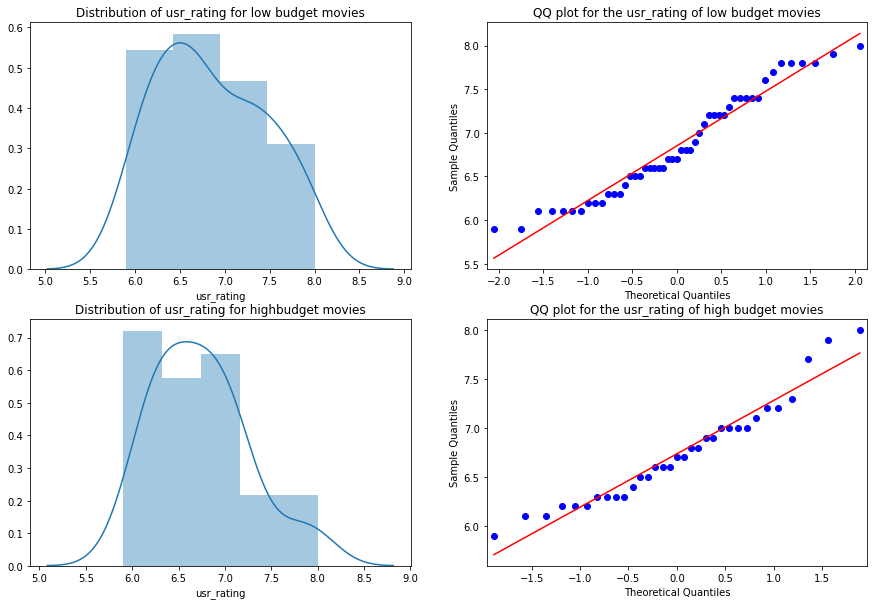

In [10]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(15,10))
sns.distplot(low_budget.usr_rating, ax = axs[0][0])
axs[0][0].set_title('Distribution of usr_rating for low budget movies')
sm.qqplot(low_budget.usr_rating, ax = axs[0][1], line = 'r')
axs[0][1].set_title('QQ plot for the usr_rating of low budget movies')
sns.distplot(high_budget.usr_rating, ax = axs[1][0])
axs[1][0].set_title('Distribution of usr_rating for highbudget movies')
sm.qqplot(high_budget.usr_rating, ax = axs[1][1], line = 'r')
axs[1][1].set_title('QQ plot for the usr_rating of high budget movies')
plt.show()

Distribution plot shows that the data is close to the normal distribution, if there was a larger sample size, it would be more bell shaped.
QQ plot shows that both data is located alongside of the straight line.

In [11]:
print('low:', low_budget.usr_rating.mean(), '\nhigh:', high_budget.usr_rating.mean())
test = stats.ttest_ind(low_budget.usr_rating, high_budget.usr_rating, equal_var = False)
df = low_budget.usr_rating.count() + high_budget.usr_rating.count() - 2
print("T-test with the degree of freedom =", df, '\nhas a statistic =', test[0], 'and pvalue =', test[1])

low: 6.851020408163264 
high: 6.736363636363635
T-test with the degree of freedom = 80 
has a statistic = 0.922531927535517 and pvalue = 0.35919691884023075


## Conclusion
After conducting the two-sided t-test with unequal variances the following was obtained: 

$statistic = 0.922531927535517 \\ pvalue = 0.35919691884023075$

Since $pvalue$ is significantly larger than $\alpha = 0.05$ confidence level, we fail to reject the null hypothesis ($H_0: \mu_1 = \mu_2$). This means that there is not enough evidence to claim that high-budget movies have significantly different average user rating than low-budget movies.

Overall, I enjoyed doing this research, mainly because this question came up once when I was discussing movies with my friends and now I have a statisticaly proven answer to that. Among many known information about the movie, the budget does not significantly affect the rating that it receives. I liked working on this topic that I would actually do some other tests concering the topic, but focused on other variables such as box office results, metacritic scores and genres of the movies.

Few things that I found out alongside my main research. <br>
•The average rating of the movie is around 6-7 which is higher than 5 - the middle of the available range and intuitively expected mean. Nevertheless, the distribution is normal for the rating. <br>
•Modern movies (21st cent.) have smaller spread of user rating, this could be an interesting thing to research.<br> 
•There are more english movies than others, which intuitvely might be expected, but this depends on the sampling method, so no strong statements could have been made about it.

There are few things I would like to improve when I will redo this project. <br>
•To implement my own random sampling algorithm which will not involve third-party websites. Honestly, the algorithm behind the SuggestMeMovie is unknown and it might affect my research significantly. But I trusted my intuition after sending so many requests to that website. I actually know the way to implement my own random sampling algorithm, which is to generate seven digits and check whether the page belongs to the movie or tv. However it would've taken much more time during web-scraping and I came up with this idea too late in the project.<br>
•Since movie budget is a currency, there is one thing not considered - inflation. Budgets of the movies are usually shown without inflation, so as time passes movie's actual budget changes compared to the modern ones. However, I considered only 21st century's movies and in the movie business it's usually not a common thing to subject the budget of the modern movies to the inflation. Usually when providing statistics about the movies, the organization change the values of the budget only for very old movies.<br>
•Lastly, I wish there was a way to see rating distribution for each movie separately. If there was a way to see how many users gave certain number for each movie, then my project would've looked completely different and much more precise.



